<a href="https://colab.research.google.com/github/seanb7/GEOL-450/blob/main/Gravitational_Anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

In [6]:
# Create a regional Map with Magnetics
ascname = 'FisherCaldera.asc'
f = open(ascname, 'r')

# Read by Lines
for i, line in enumerate(f):
    if i <7:
      line = line.strip()
      columns = line.split()

      # Read the Head of the file
      if columns [0] == 'ncols':
        ncols = int(columns[1])
      if columns [0] == 'nrows':
        nrows = int(columns[1])
      if columns [0] == 'xllcorner':
        xllcorner = float(columns[1])
      if columns [0] == 'yllcorner':
        yllcorner = float(columns[1])
      if columns [0] == 'cellsize':
        cellsize = float(columns[1])
      if columns [0] == 'nodata_value':
        NODATA_value = float(columns[1])

# Create X,Y Mesh
x = cellsize * np.arange (ncols) + xllcorner
y = cellsize * np.arange (nrows) + yllcorner

# Read by Lines
datamat = np.genfromtxt(ascname, skip_header=6, dtype = float)

# Substitute the nodata value
datamat[datamat == NODATA_value] = 'nan'

In [8]:
# Read Gravitational Data
data = pd.read_csv('FisherGravPts.csv')
data.head()

,Station,lon,lat,z_m,gl,Season_1,Season_2,Season_3
0,F1,-164.5000,54.5800,77,9.814714,981456.68226,981456.83744,981456.95964
1,T1,-164.4800,54.5800,162,9.814714,981439.96971,981440.17970,981440.34510
2,T2,-164.4750,54.5900,180,9.814723,981437.61795,981437.91138,981438.14258
3,T3,-164.4531,54.5987,201,9.814730,981434.66674,981435.09317,981435.42927
4,T4,-164.4400,54.6000,222,9.814731,981431.47935,981432.12969,981432.64229


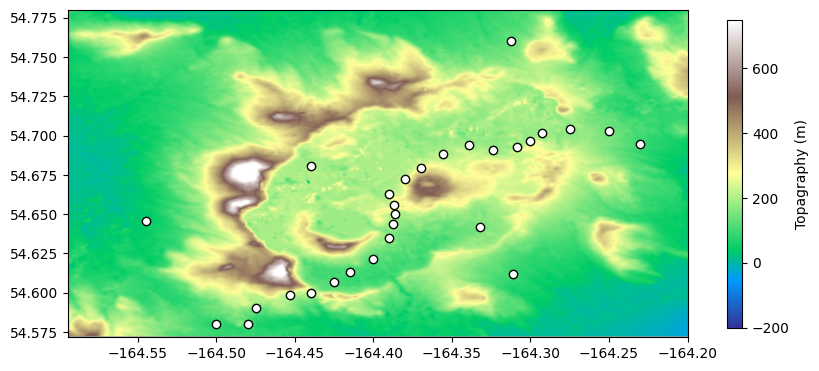

In [10]:
# Plot Map of Survey Locations
fig, axl = plt.subplots()
cs = plt.imshow(datamat,
                extent = [x.min(), x.max(), y.min(), y.max()],
                cmap = "terrain", vmin = -200, vmax = 750)
plt.plot(data.lon, data.lat, 'ko', markerfacecolor = 'w')
fig = plt.gcf()
fig.set_size_inches (10,8)
cbar = fig.colorbar(cs, shrink = 0.5, ax =axl)
cbar.set_label('Topagraphy (m)')
plt.show()
fig.savefig('FisherGravPts.png')

In [ ]:
# Calculate the FAA (Free Air Anomaly) correction